In [809]:
from bs4 import BeautifulSoup
import os
import svglib as svg
import drawSvg as draw
from IPython.core.display import SVG
import ipyplot

In [810]:
ICON_DIRECTORY = r'D:\Files\GameDev\qaptoR Eingen\godot\editor\icons'

icon_files = []
icons = {}
colors = set()
icon_groups = {}


In [811]:
def draw_color (color :str):
	d = draw.Drawing(32, 16, origin=(0, 0), displayInline=True)
	d.append(draw.Rectangle(0, 0, 32, 16, fill=color))
	d.setPixelScale(2)
	return d
#...

def draw_colors (colors :list):
	d = draw.Drawing(32*len(colors), 16, origin=(0, 0), displayInline=True)
	for i in range(len(colors)):
		d.append(draw.Rectangle(32*i, 0, 32, 16, fill=colors[i]))
	#...
	d.setPixelScale(2)
	
	return d
#...

def draw_icons (colors :list):
	small_group = []
	tset = set()
	for color in colors: 
		for icon in list(icon_groups[color]): tset.add(icon)
	#...
	for icon in tset: small_group.append(icon)
	return ipyplot.plot_images(small_group, small_group, img_width=64, show_url=False, max_images=285)
#...

def visualize (colors :list):

	print(sum([len(icon_groups[color]) for color in colors]), len(colors), colors)
	draw_icons(colors)
	return draw_colors(colors)
#...

In [812]:
for file in os.listdir(ICON_DIRECTORY):
	if file.endswith('.svg'): icon_files.append(file)
	# else: print(file)
#...

In [813]:
for file in icon_files:
	
	with open(file, 'r') as svg:

		soup = BeautifulSoup(svg, 'html.parser')

		groups = soup.select('g')
		paths = soup.select('path') 

		for group in groups:
			color = group.get('fill', 'None')
			if not color in icon_groups: icon_groups.update({color:set()})
			icon_groups[color].add(file)
		for path in paths: 
			color = path.get('fill', 'None')
			if not color in icon_groups: icon_groups.update({color:set()})
			icon_groups[color].add(file)
	#...
#...

C:\Python310\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [814]:
# print(len(icon_groups))
# with open('color_groups.txt', 'w') as colorfile:
# 	for color in icon_groups.items(): colorfile.write(f"{len(color[1])}: {color}\n\n\n")
# for item in icon_groups.items():
# ['#e0e0e0' for i in range(len(icon_groups['#e0e0e0']))]

285 1 ['#e0e0e0']


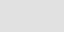

In [861]:
colors = ['#e0e0e0'] # editor icons
visualize(colors)

60 1 ['#a5efac']


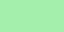

In [816]:
colors = [ # Control nodes
	'#a5efac'
]
visualize(colors)

51 1 ['none']


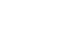

In [817]:
colors = [ # probably show up in other groups
	'none'
]
visualize(colors)

17 1 ['#84ffb1']


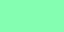

In [818]:
colors = [ # RGB: GREEN
	'#84ffb1'
]
visualize(colors)

40 1 ['#a5b7f3']


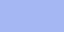

In [819]:
colors = [ # 2D nodes
	'#a5b7f3'
]
visualize(colors)

176 1 ['None']


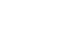

In [820]:
colors = [ # probably show up in other groups
	'None'
]
visualize(colors)

57 1 ['#fc9c9c']


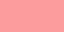

In [821]:
colors = [ # 3D nodes
	'#fc9c9c'
]
visualize(colors)

14 1 ['#ffd684']


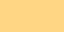

In [822]:
colors = [ # mesh resources
	'#ffd684'
]
visualize(colors)

6 1 ['#cea4f1']


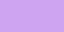

In [823]:
colors = [ # animation nodes
	'#cea4f1'
]
visualize(colors)

19 1 ['url(#a)']


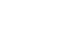

In [824]:
colors = [ # because using gradients?
	'url(#a)'
]
visualize(colors)

60 1 ['#fff']


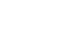

In [825]:
colors = [ # grey?
	'#fff'
]
visualize(colors)

7 1 ['#84c2ff']


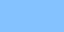

In [826]:
colors = [ # RGB -BLUE
	'#84c2ff'
]
visualize(colors)

4 1 ['#2998ff']


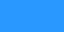

In [827]:
colors = [ # COLLISION SHAPE BLUE :DARK
	'#2998ff'
]
visualize(colors)

9 1 ['#68b6ff']


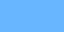

In [828]:
colors = [ # COLLISION SHAPE BLUE :MED
	'#68b6ff'
]
visualize(colors)

5 1 ['#a2d2ff']


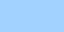

In [829]:
colors = [ # COLLISION SHAPE BLUE :LIGHT
	'#a2d2ff'
]
visualize(colors)

15 2 ['#ffeb70', '#ffe345']


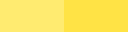

In [830]:
colors = [ # RAINBOW ICONS: YELLOW
	'#ffeb70', '#ffe345',
]
visualize(colors)

16 2 ['#9dff70', '#80ff45']


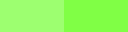

In [831]:
colors = [ # RAINBOW ICONS: GREEN
	'#9dff70', '#80ff45',
]
visualize(colors)

16 2 ['#70ffb9', '#45ffa2']


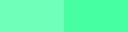

In [832]:
colors = [ # RAINBOW ICONS: SEAFOAM
	'#70ffb9', '#45ffa2',
]
visualize(colors)

16 2 ['#70deff', '#45d7ff']


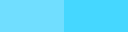

In [833]:
colors = [ # RAINBOW ICONS: SKYBLUE
	'#70deff', '#45d7ff',
]
visualize(colors)

15 2 ['#ff70ac', '#ff4596']


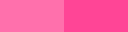

In [834]:
colors = [ # RAINBOW ICONS: PINK
	'#ff70ac', '#ff4596',
]
visualize(colors)

15 2 ['#9f70ff', '#8045ff']


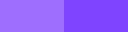

In [835]:
colors = [ # RAINBOW ICONS: PURPLE
	'#9f70ff', '#8045ff', 
]
visualize(colors)

20 2 ['#ff7070', '#ff4545']


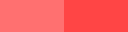

In [836]:
colors = [ # RAINBOW: RED
	'#ff7070', '#ff4545',
 ]
visualize(colors)

14 1 ['#ff8484']


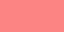

In [837]:
colors = [ # RGB: RED
	'#ff8484'
]
visualize(colors)

16 1 ['#919191']


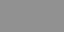

In [838]:
colors = [ # CONTROL: SCREEN ALIGNMENT :MED GREY
	'#919191'
]
visualize(colors)

16 1 ['#474747']


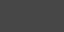

In [839]:
colors = [ # CONTROL: SCREEN ALIGNMENT :DARK GREY
	'#474747'
]
visualize(colors)

18 1 ['#d6d6d6']


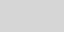

In [840]:
colors = [ # CONTROL: SCREEN ALIGNMENT :LIGHT GREY
	'#d6d6d6'
]
visualize(colors)

13 2 ['#ff5d5d', '#ffdd65']


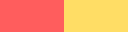

In [841]:
colors = [ # ERROR: RED, WARNING: YELLOW
	'#ff5d5d', '#ffdd65',
]
visualize(colors)

9 1 ['#f7f5cf']


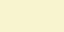

In [842]:
colors = [ # GIZMO ICONS: BONE
	'#f7f5cf'
]
visualize(colors)

6 1 ['#fefefe']


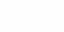

In [843]:
colors = [ # GIZMO ICONS: ASH WHITE
	'#fefefe'
]
visualize(colors)

6 1 ['#77ce57']


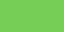

In [844]:
colors = [ # TRANSITION: GREEN
	'#77ce57'
]
visualize(colors)

5 1 ['#f5f5f5']


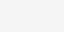

In [845]:
colors = [ # CURVE ICONS: LIGHT GREY
	'#f5f5f5'
]
visualize(colors)

3 3 ['#4490fc', '#c9cfd4', '#fce844']


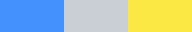

In [846]:
colors = [ # ADD ___ TILE
	'#4490fc', '#c9cfd4', '#fce844',
]
visualize(colors)

3 1 ['#70bfff']


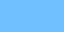

In [847]:
colors = [ # RAINBOW RED: RGB SET: BLUE
	'#70bfff', 
]
visualize(colors)

3 1 ['#7aff70']


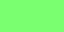

In [848]:
colors = [ # RAINBOW RED: RGB SET: GREEN
	'#7aff70'
]
visualize(colors)

4 4 ['#a3b6f3', '#708cea', '#69f', '#3552b1']


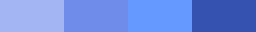

In [849]:
colors = [ # SHOULD BE 2D
	'#a3b6f3', '#708cea', '#69f', '#3552b1',
]
visualize(colors)

2 1 ['#ff8585']


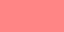

In [850]:
colors = [ # DEBUG RED
	'#ff8585',
]
visualize(colors)

9 3 ['#355570', '#478cbf', '#414042']


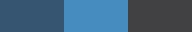

In [851]:
colors = [ # GODOT TM COLORS
	'#355570', '#478cbf', '#414042'
]
visualize(colors)

2 2 ['#e9afaf', '#800000']


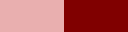

In [852]:
colors = [ # DELETE SPLIT
	'#e9afaf', '#800000',
]
visualize(colors)

9 7 ['#d9d9d9', '#d5d5d5', '#999', '#000003', '#f2f2f2', '#fefeff', '#4b4b4b']


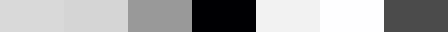

In [853]:
colors = [ # SHOULD BE EDITOR
	'#d9d9d9', '#d5d5d5', '#999', '#000003', '#f2f2f2', '#fefeff', '#4b4b4b', 
]
visualize(colors)

5 1 ['#b4b4b4']


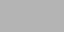

In [854]:
colors = [ # SHOULD NOT BE GIZMO
	'#b4b4b4',
]
visualize(colors)

3 1 ['#699ce8']


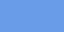

In [855]:
colors = [ # GUI INTERACTION SELCTION TOGGLES
	'#699ce8',
]
visualize(colors)

1 1 ['#ffb65d']


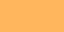

In [856]:
colors = [ # INFORMATION NOT WARNING
	'#ffb65d',
]
visualize(colors)

3 3 ['#ff4646', '#46ff46', '#4646ff']


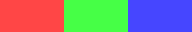

In [857]:
colors = [ # VISUAL NODE RGB
	'#ff4646', '#46ff46', '#4646ff', 
]
visualize(colors)

25 20 ['#ee7991', '#e3ec69', '#8da6f0', '#77edb1', '#61daf4', '#7dc6ef', '#79f3e8', '#6993ec', '#f77070', '#69ec9e', '#6ba7ec', '#bd91f1', '#e286f0', '#ec69a3', '#f191a5', '#69ec9a', '#f6a86e', '#c4ec69', '#69ecbd', '#6f91f0']


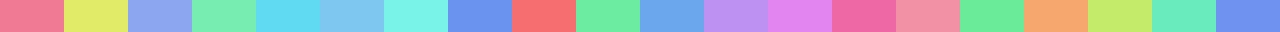

In [858]:
colors = [ # LETTER ICONS
	'#ee7991', '#e3ec69', '#8da6f0', '#77edb1', '#61daf4', '#7dc6ef', '#79f3e8',
	'#6993ec', '#f77070', '#69ec9e', '#6ba7ec', '#bd91f1', '#e286f0', '#ec69a3',
	'#f191a5', '#69ec9a', '#f6a86e', '#c4ec69', '#69ecbd', '#6f91f0',
]
visualize(colors)

14 8 ['#eac968', '#68d0ea', '#ac73f1', '#35d4f4', '#cf68ea', '#eae068', '#ea686c', '#b8ea68']


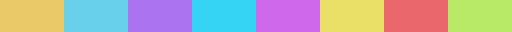

In [859]:
colors = [ # VISUAL SHADER COLORS
	'#eac968', '#68d0ea', '#ac73f1', '#35d4f4', '#cf68ea', '#eae068', '#ea686c', '#b8ea68', 
]
visualize(colors)

In [860]:
colors = [ # 
	'#',
]
# visualize(colors)